In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv


In [14]:
import pandas as pd

data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv")

In [15]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
data.isnull().sum() #check if missing values present in a data

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
data.duplicated().sum() #check if duplicates are present in a data

0

In [18]:
data.keys()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
del data["RowNumber"]
del data["CustomerId"]
del data['Surname']

In [20]:
for i in data.keys():
    print(data[i].value_counts())

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
HasCrCard
1    7055
0    2945
Name: count, dtype:

In [21]:
import pandas as pd

# Mapping for one-hot encoding
gender_map = {'Female': 0, 'Male': 1}

# Apply the mapping to the Gender column
data['Gender'] = data['Gender'].map(gender_map)

# Display the DataFrame with the encoded Gender column
print(data)


      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France       0   42       2       0.00              1   
1             608     Spain       0   41       1   83807.86              1   
2             502    France       0   42       8  159660.80              3   
3             699    France       0   39       1       0.00              2   
4             850     Spain       0   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France       1   39       5       0.00              2   
9996          516    France       1   35      10   57369.61              1   
9997          709    France       0   36       7       0.00              1   
9998          772   Germany       1   42       3   75075.31              2   
9999          792    France       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

In [22]:

newmap = {'Spain':0,'Germany':1,'France':2}

# Apply the mapping to the Gender column
data['Geography'] = data['Geography'].map(newmap)

# Display the DataFrame with the encoded column
print(data)


      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          2       0   42       2       0.00              1   
1             608          0       0   41       1   83807.86              1   
2             502          2       0   42       8  159660.80              3   
3             699          2       0   39       1       0.00              2   
4             850          0       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          2       1   39       5       0.00              2   
9996          516          2       1   35      10   57369.61              1   
9997          709          2       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          2       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  E

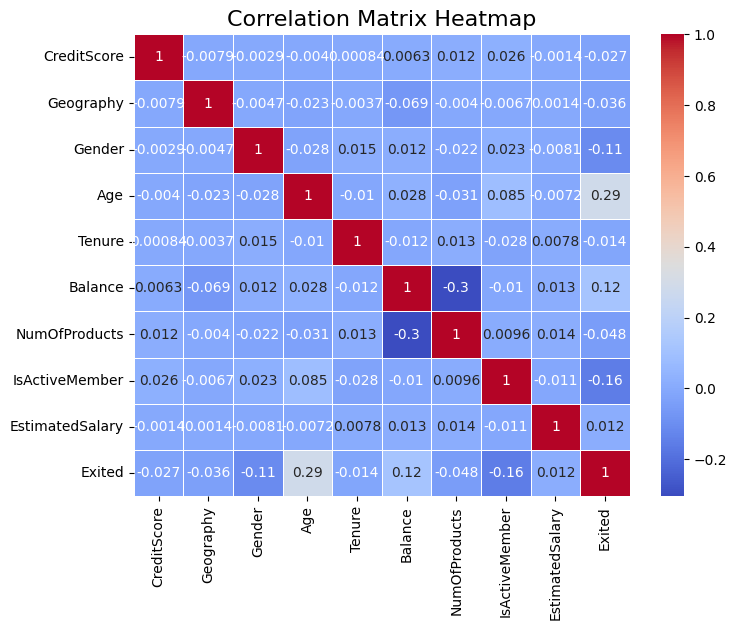

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()


In [25]:
del data["HasCrCard"]

KeyError: 'HasCrCard'

In [28]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 9].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train);

In [32]:
y_pred = classifier.predict(X_train)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8295714285714286


In [35]:
y_pred = classifier.predict(X_test)

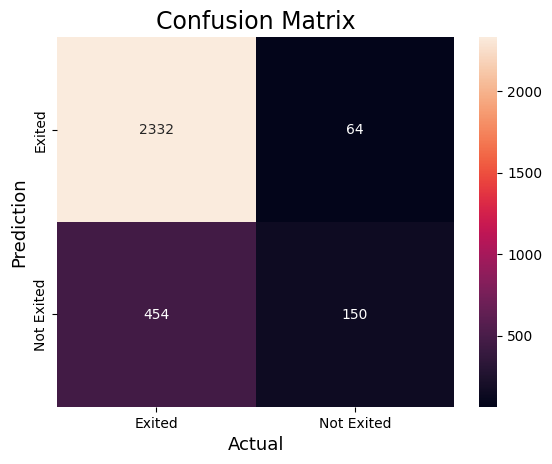

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Exited','Not Exited'],
            yticklabels=['Exited','Not Exited'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [37]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2396
           1       0.70      0.25      0.37       604

    accuracy                           0.83      3000
   macro avg       0.77      0.61      0.63      3000
weighted avg       0.81      0.83      0.79      3000

Accuracy: 0.8273333333333334
